<a href="https://colab.research.google.com/github/RaghulSAEC/CODSOFT/blob/main/task_3_sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
!mkdir -p content/drive
drive.mount('content/drive')

Drive already mounted at content/drive; to attempt to forcibly remount, call drive.mount("content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import zipfile

In [ ]:
import pandas as pd
data = pd.read_csv('spam (1).csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = data['v2']
y = data['v1']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}


for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


def predict_spam(message, classifier=classifiers["Support Vector Machine"]):
    message_tfidf = vectorizer.transform([message])
    prediction = classifier.predict(message_tfidf)[0]
    return prediction


new_messages = [
    "Congratulations! You've won a free cruise!",
    "Hey, can you pick up some milk on your way home?"
]

for message in new_messages:
    prediction = predict_spam(message)
    if prediction == 'spam':
        print(f"'{message}' is likely spam.")
    else:
        print(f"'{message}' is likely not spam.")

--- Naive Bayes ---
Accuracy: 0.9668161434977578
Classification Report:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix:
[[965   0]
 [ 37 113]]


--- Logistic Regression ---
Accuracy: 0.9524663677130045
Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
[[962   3]
 [ 50 100]]


--- Support Vector Machine ---
Accuracy: 0.9766816143497757
Classification Report:
              precision  

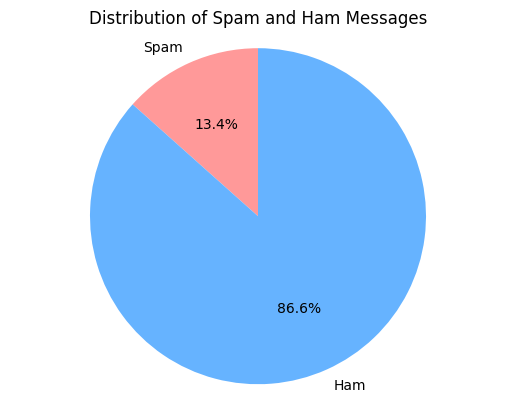

In [ ]:
import matplotlib.pyplot as plt


spam_count = y.value_counts()['spam']
ham_count = y.value_counts()['ham']

labels = ['Spam', 'Ham']
sizes = [spam_count, ham_count]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Spam and Ham Messages')
plt.show()